In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
from datasets import load_dataset

dataset_name = "dim/nfs_pix2pix_1920_1080_v5"
# dataset_name = "dim/nfs_pix2pix_1920_1080_v6"
dataset = load_dataset(dataset_name, num_proc=4)
dataset = dataset["train"]

In [4]:
dataset[0]["edit_prompt"]

'make nfs 2005 photorealistic'

In [ ]:
dataset[180]["edited_image"]

In [5]:
import os

os.chdir("/code/img2img-turbo/src")
import argparse
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
import torchvision.transforms.functional as F
from pix2pix_turbo import Pix2Pix_Turbo
from image_prep import canny_from_pil

model_name = ""
model_path = "/code/img2img-turbo/output/pix2pix_turbo/nfs_pix2pix_1736605715/checkpoints/model_20001.pkl"
use_fp16 = False

# initialize the model
model = Pix2Pix_Turbo(pretrained_name=model_name, pretrained_path=model_path)
model.set_eval()
if use_fp16:
    model.half()

T = transforms.Compose(
    [
        transforms.Resize(512, interpolation=transforms.InterpolationMode.LANCZOS),
        transforms.CenterCrop(512),
    ]
)

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/user-name-goes-here/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/user-name-goes-here/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
 

In [8]:
model.timesteps = torch.tensor([999], device="cuda:0")

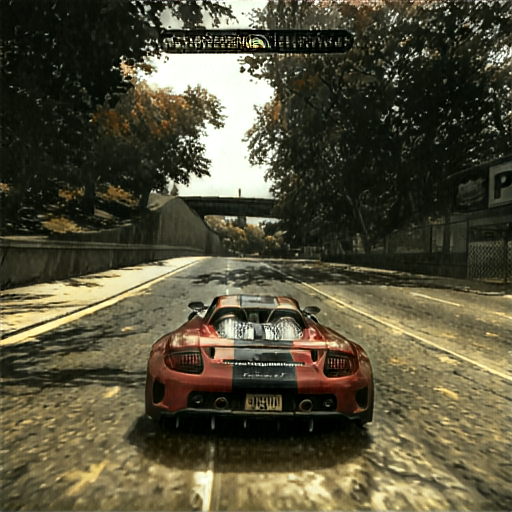

: 

In [ ]:
input_image = dataset[190]["input_image"].convert("RGB")
prompt = dataset[0]["edit_prompt"]
with torch.no_grad():
    i_t = T(input_image)
    c_t = F.to_tensor(i_t).unsqueeze(0).cuda()
    if use_fp16:
        c_t = c_t.half()
    output_image = model(c_t, prompt)

    output_pil = transforms.ToPILImage()(output_image[0].cpu() * 0.5 + 0.5)

output_pil

In [ ]:
# huggingface-cli upload dim/nfs_pix2pix_1736605715 /code/img2img-turbo/output/pix2pix_turbo/nfs_pix2pix_1736605715/checkpoints/model_20001.pkl model_20001.pkl